In [12]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

## Source ECDMS

In [13]:
## Source: http://www.ecdms.energy.ca.gov
filename = "ElectricityByUtility.csv"
filepath = os.path.join("..","data",filename)

ecdmsdf = pd.read_csv(filepath)

Number of total rows available

In [14]:
print(len(ecdmsdf))
ecdmsdf.columns

1561


Index(['Utility Type', 'Utility Name', 'Year', 'Ag & Water Pump',
       'Commercial Building', 'Commercial Other', 'Industry',
       'Mining & Construction', 'Residential', 'Streetlight', 'Total Usage'],
      dtype='object')

Number of rows per year

In [15]:
yearly_data = ecdmsdf['Year'].value_counts()

In [16]:
yearly_data.plot(kind="bar")

#### Not a rich enough time series.. moving on to the next data source

only 60+ records to use, change source

## Source EIA

In [34]:
## Source: https://www.eia.gov/totalenergy/data/browser/?tbl=T10.05#/?f=M
filename = "MER_T10_05.csv"
filepath = os.path.join("..","data",filename)

eiadf = pd.read_csv(filepath)
print(len(eiadf))
eiadf.head()

6732


,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,SOT8BUS,194913,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
1,SOT8BUS,195013,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
2,SOT8BUS,195113,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
3,SOT8BUS,195213,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
4,SOT8BUS,195313,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu


In [35]:
eiadf['Description'].value_counts()

Utility-Scale Solar Energy Consumption for Electricity: Industrial Sector          612
Distributed Solar Energy Consumption:  Total                                       612
Distributed Solar Energy Consumption for Electricity:  Commercial Sector           612
Utility-Scale Solar Energy Consumption for Electricity: Commercial Sector          612
Utility-Scale Solar Energy Consumption for Electricity:  Electric Power Sector     612
Distributed Solar Energy Consumption for Electricity:  Total                       612
Distributed Solar Energy Consumption for Electricity:  Industrial Sector           612
Solar Energy Consumption                                                           612
Distributed Solar Energy Consumption for Heat:  Total                              612
Distributed Solar Energy Consumption for Electricity:  Residential Sector          612
Utility-Scale Solar Energy Consumption: Total                                      612
Name: Description, dtype: int64

In [36]:
values = eiadf[['Value', 'YYYYMM']]
values = values.loc[values['Value'] != "Not Available"]
len(values)

4375

#### Not all rows correspond to the same category. We need to select just one, this reduces the data from 612 records to 445

In [42]:
# v = eiadf.loc[eiadf['Description']=="Solar Energy Consumption"]
# v = v.loc[v['Value'] != "Not Available"]
# len(v)
v = eiadf.loc[(eiadf['Description'] == "Solar Energy Consumption") & 
              (eiadf['Value'] != "Not Available")]
v.dtypes

MSN             object
YYYYMM           int64
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

#### Further clean up to remove totals YYYY13 records reduces the data to 399 rows

In [1]:
#remove the data for month 13 (total year consumption)
# make a copy to a string type
#v["dates"] = v['YYYYMM'].astype(str)
v["dates"] = pd.to_datetime(v["YYYYMM"], format="%Y%m")
#remove rows tha contain 13 in the string
# v = v.loc[~v['dates'].str.contains('13')]

NameError: name 'pd' is not defined

In [11]:
v = v.drop(columns=['MSN','Column_Order',"Description","Unit","dates"])
v.to_csv("../data/monthdata.csv", index=False)
v.head()

,YYYYMM,Value
6287,198401,-0.001
6288,198402,0.001
6289,198403,0.002
6290,198404,0.003
6291,198405,0.007


In [20]:
v.plot()

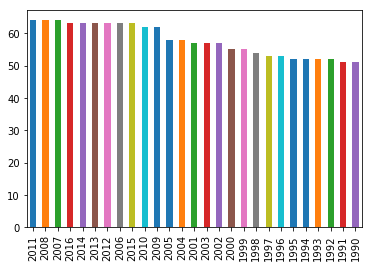

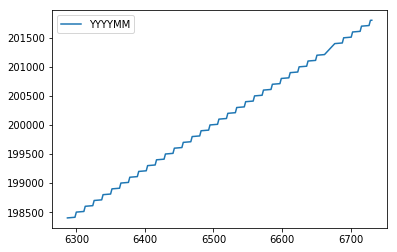

In [21]:
plt.show()

### PREVIOUS WAY of getting 13 out

In [14]:
values.columns

Index(['Value', 'YYYYMM'], dtype='object')

In [15]:
#values.filter(lambda x: x['YYYYMM'].astype(str)[-2])



from datetime import datetime
df=[]
for i, row in values.iterrows():
    if(str(row["YYYYMM"])[-2:]=='13' or row["Value"]=="No Data Reported"):
        continue
    else:
        df.append(row)
ls1 = [float(i["Value"]) for i in df]
ls2 = [datetime.strptime(str(i["YYYYMM"]),"%Y%m") for i in df]
df = pd.DataFrame(data={"YYYYMM":ls2,"Value":ls1, })
df


#[i for i in list(values.loc[:,"YYYYMM"]) if str(i)[-2] =="13"]

,YYYYMM,Value
0,1989-01-01,2.792
1,1989-02-01,3.010
2,1989-03-01,4.147
3,1989-04-01,4.571
4,1989-05-01,5.046
5,1989-06-01,5.092
6,1989-07-01,5.345
7,1989-08-01,5.290
8,1989-09-01,4.825
9,1989-10-01,4.397


In [159]:
df.to_csv("data/monthdata.csv", index=False)

In [160]:
#remove values totals respresented with YYYY13

df.plot()
plt.show()

ValueError: ordinal must be >= 1

In [3]:
## Source: https://www.eia.gov/totalenergy/data/browser/?tbl=T10.01#/?f=M
filename = "MER_T10_01.csv"
filepath = os.path.join("data",filename)

eiadf1 = pd.read_csv(filepath)
eiadf1.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,BFPRBUS,194913,Not Available,1,Biofuels Production,Trillion Btu
1,BFPRBUS,195013,Not Available,1,Biofuels Production,Trillion Btu
2,BFPRBUS,195113,Not Available,1,Biofuels Production,Trillion Btu
3,BFPRBUS,195213,Not Available,1,Biofuels Production,Trillion Btu
4,BFPRBUS,195313,Not Available,1,Biofuels Production,Trillion Btu


In [40]:
eiadf1['Description'].value_counts()

Hydroelectric Power Consumption       612
Total Renewable Energy Consumption    612
Total Biomass Energy Consumption      612
Biofuels Consumption                  612
Solar Energy Consumption              612
Total Biomass Energy Production       612
Geothermal Energy Consumption         612
Wood Energy Consumption               612
Biofuels Production                   612
Wind Energy Consumption               612
Waste Energy Consumption              612
Total Renewable Energy Production     612
Name: Description, dtype: int64

In [7]:
print(len(eiadf1))
values1 = eiadf1[['Value', 'YYYYMM', 'Description']]
values1 = values1.loc[values1['Description'] == "Solar Energy Consumption"]


7344


In [8]:
len(values1)

612

In [9]:
values1

,Value,YYYYMM,Description
3060,Not Available,194913,Solar Energy Consumption
3061,Not Available,195013,Solar Energy Consumption
3062,Not Available,195113,Solar Energy Consumption
3063,Not Available,195213,Solar Energy Consumption
3064,Not Available,195313,Solar Energy Consumption
3065,Not Available,195413,Solar Energy Consumption
3066,Not Available,195513,Solar Energy Consumption
3067,Not Available,195613,Solar Energy Consumption
3068,Not Available,195713,Solar Energy Consumption
3069,Not Available,195813,Solar Energy Consumption
